In [1]:
import pandas as pd
import numpy as np

In [2]:
wine_data = pd.read_csv('data/winequality-white.csv',
                       names=[
                           "Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar",
                           "Chlorides","Free Sulfur Dioxide","Total Sulfur Dioxide","Density",
                           "pH","Sulphates","Alcohal","Quality"],
                       skiprows=1,
                       sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohal,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


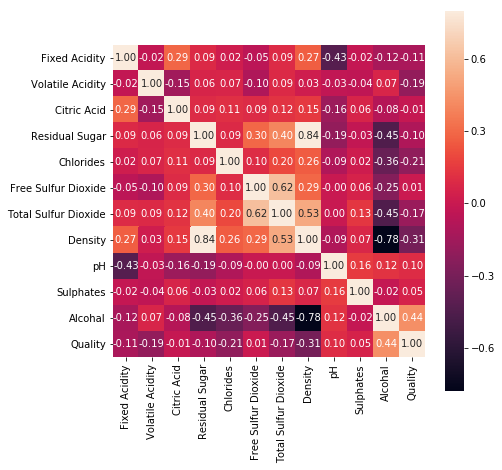

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True, annot=True,fmt='.2f')
plt.show()

In [6]:
X = wine_data.drop('Quality',axis=1)
y = wine_data['Quality']

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
score = classifier.score(x_test,y_test)
print(score)

0.5755102040816327


In [11]:
classifier.n_features_

11

In [12]:
classifier.feature_importances_

array([0.07923643, 0.09893287, 0.06965697, 0.0731795 , 0.09380568,
       0.10958261, 0.09094577, 0.08307549, 0.08825368, 0.08285472,
       0.13047628])

In [13]:
import sklearn.tree as tree
tree.export_graphviz(classifier,out_file='tree.dot', feature_names=X.columns)

In [15]:
from subprocess import call

call(['dot','-T','png','tree.dot','-o','tree.png'])

FileNotFoundError: [WinError 2] The system cannot find the file specified